# 2 - IMPORTS

## 2.1 - Python Libraries

In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import statistics

# Data
from sklearn import datasets

# Validator
from scipy.stats import norm

# Data visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Machine Learning Model
from sklearn.neighbors import KNeighborsClassifier

# Data normalization
from sklearn.preprocessing import MinMaxScaler

# Data standardization
from sklearn.preprocessing import StandardScaler

# Data dimensionality reduction
from sklearn.decomposition import PCA

# Splitting data for training and testing the model
from sklearn.model_selection import train_test_split

# Model accuracy evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Parameter optimization
from sklearn.model_selection import GridSearchCV


## 2.2 - Functions

### 2.2.1 - [Plot Triangule Correlation Heatmap](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [2]:
def plot_triangle_correlation_heatmap(data):
    """
    Plot a triangular correlation heatmap of the input data.

    Parameters:
    - data: Pandas DataFrame, the input data for which the correlation heatmap is to be plotted.

    This function generates a triangular correlation heatmap using seaborn and displays it using Matplotlib.

    The heatmap displays the pairwise correlations between columns in the input DataFrame 'data'.
    """
    # Compute the correlation matrix
    corr = data.corr()

    # Create a boolean mask to display only the lower triangular part of the heatmap
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set the visual style of the plot to 'white'
    sns.set_theme(style="white")

    # Set the size of the plot and create the heatmap using seaborn
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(corr,
                          mask=mask,
                          cmap="rocket_r",
                          annot=True,
                          fmt=".2f",
                          linewidths=.5)

    # Set the title for the heatmap
    heatmap.set_title("Triangle Correlation Heatmap", pad=16)

    # Display the heatmap
    plt.show()

### 2.2.2 - Plot Feature Distributions by Target

In [3]:
def plot_feature_distributions_by_target(data, target):
    """
    Plot feature distributions by a specified target variable.

    Parameters:
    - data: Pandas DataFrame, the input data containing features and the target variable.
    - target: str, the name of the target variable.

    This function creates a grid of subplots to visualize the distributions of features
    with respect to the target variable.

    The 'data' DataFrame should contain both feature columns and the specified 'target' column.
    """
    
    # Set the size of the overall figure
    plt.figure(figsize=(15, 15))

    num_rows = 4  # Number of rows in the subplot grid
    num_cols = 4  # Number of columns in the subplot grid

    # Iterate through feature columns and create subplots
    for i, col in enumerate(data.drop(columns=target).columns):
        # Create a subplot in the grid
        plt.subplot(num_rows, num_cols, i + 1)

        # Create a stacked histogram for the current feature and target variable
        sns.histplot(data=data, x=col, hue=target, multiple="stack", palette="dark")

        # Set the title for the subplot
        plt.title(f'{col} Distribution', fontsize=16)

    # Adjust subplot layout for better visualization
    plt.tight_layout()

    # Display the figure with subplots
    plt.show()

### 2.2.2 - Plot Coefficient Magnitude Comparison

In [4]:
def plot_coefficient_magnitude_comparison(features_to_compare, data):
    """
    Plot the magnitude of coefficients for comparison.

    Parameters:
    - features_to_compare: list of str, feature names for which coefficients are compared.
    - data: Pandas DataFrame, containing coefficient values for the specified features.

    This function generates a plot comparing the magnitude of coefficients for different features.
    The 'features_to_compare' list specifies the features to be compared.
    """

    # Create a figure for the plot with a specified size
    plt.figure(figsize=(10, 6))

    # Define a list of markers to distinguish different features on the plot
    markers = ['o', 's', '^', 'v', '<', '>', 'p', '*']

    for i, feature in enumerate(features_to_compare):
        # Choose a marker from the list, cycling through markers if necessary
        marker = markers[i % len(markers)]

        # Plot the coefficient values for the current feature with the chosen marker
        plt.plot(data[feature], marker, label=feature)

    # Add a legend to the plot for feature identification
    plt.legend(loc='best')

    # Set labels for the y-axis and x-axis
    plt.ylabel('Coefficient Magnitude')
    plt.xlabel('Coefficient Index')

    # Set the title for the plot
    plt.title('Comparison of Coefficient Magnitudes for Features')

    # Display the plot
    plt.show()

### 2.2.3 - Find and Analyze Outliers

In [5]:
def find_and_analyze_outliers(data):
    """
    Identify and analyze outliers in numeric columns of a DataFrame.

    Parameters:
        data (pd.DataFrame): Input DataFrame containing numeric columns.

    Returns:
        df_outliers (pd.DataFrame): DataFrame containing rows with outliers.
        df_outliers_analyze (pd.DataFrame): DataFrame summarizing outlier count and percentage.
    """
    # Select numeric columns from the input DataFrame
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])

    # Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers detection using IQR method
    inf_lim = Q1 - 1.5 * IQR
    sup_lim = Q3 + 1.5 * IQR

    # Identify outliers using lower and upper bounds
    outliers = ((numeric_columns < inf_lim) | (numeric_columns > sup_lim))

    # Count the number of outliers and calculate the percentage of outliers in each column
    outliers_count = outliers.sum()
    outliers_percentage = (outliers.sum() / len(numeric_columns)) * 100

    # Extract rows with any outlier in at least one numeric column
    df_outliers = data[outliers.any(axis=1)]

    # Create a DataFrame summarizing outlier count and percentage
    df_outliers_analyze = pd.DataFrame({
        'Outliers Count': outliers_count,
        'Outliers Percentage': outliers_percentage,
    })

    # Filter rows with non-zero outlier counts
    df_outliers_analyze = df_outliers_analyze[df_outliers_analyze['Outliers Count'] > 0]

    # Sort the DataFrame by 'Outliers Count' in descending order
    df_outliers_analyze = df_outliers_analyze.sort_values(by='Outliers Count', ascending=False)

    # Return DataFrame with outliers and summary DataFrame
    return df_outliers, df_outliers_analyze


### 2.2.4 - Plot Boxplot

In [6]:
def plot_boxplot(data, features=None):
    """
    Plot boxplots to visualize the distribution of features, optionally grouped by class.

    Parameters:
    - data: Pandas DataFrame containing the data to be visualized.
    - features: List of feature names to be plotted. If not provided, all columns are used.

    This function creates a grid of boxplots to visualize the distribution of features.
    Optionally, you can group the boxplots by a 'class' variable if it exists in the DataFrame.
    """

    # Set the size of the overall figure
    plt.figure(figsize=(15, 10))

    if features is None:
        features = data.columns

    # Iterate through the specified features and create subplots
    for i, feature in enumerate(features):
        plt.subplot(3, 5, i + 1)

        # Create a boxplot for the current feature, optionally grouped by 'class'
        sns.boxplot(y=feature, hue='class', data=data)

        # Set the title, x-axis label, and y-axis label for the subplot
        plt.title(f'{feature} by Class')
        plt.xlabel('Class')
        plt.ylabel(feature)

    # Adjust subplot layout for better visualization
    plt.tight_layout()

    # Display the figure with subplots
    plt.show()

### 2.2.5 - Plot Normal Distribution Comparison

In [7]:
def plot_normal_distribution_comparison(data, target=''):
    """
    Plot comparisons of normal distributions for data columns.

    Parameters:
    - data: Pandas DataFrame containing data columns to compare.
    - target: Optional parameter specifying a target column to exclude from the comparison.

    This function generates a grid of subplots to compare the data column distributions to normal distributions.
    It calculates the mean and standard deviation of each column and overlays a normal distribution curve for visual comparison.
    """

    # Set the size of the overall figure
    plt.figure(figsize=(15, 15))

    num_rows = 4  # Number of rows in the subplot grid
    num_cols = 4  # Number of columns in the subplot grid

    # Iterate through the data columns and create subplots
    for i, column in enumerate(data.drop(columns=target).columns):
        plt.subplot(num_rows, num_cols, i + 1)

        # Create a histogram of the data column with specified bins, density, and color
        plt.hist(data[column], bins=30, density=True, alpha=0.6, color='g')

        # Calculate the mean and standard deviation of the data column
        column_mean = np.mean(data[column])
        column_std = np.std(data[column])

        # Generate values for the normal distribution using the calculated mean and standard deviation
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, column_mean, column_std)
        plt.plot(x, p, 'k', linewidth=2)

        # Set the title, x-axis label, and y-axis label for the subplot
        plt.title(f"Normal Distribution Plot for {column}")
        plt.xlabel(f"{column}")

    # Adjust subplot layout for better visualization
    plt.tight_layout()

    # Display the figure with subplots
    plt.show()

### 2.2.6 - Train and Evaluate KNN Model

In [8]:
def train_and_evaluate_knn_model(scale_name, X, y, n_neighbors=3, random_state=37):
    """
    Train and evaluate a k-Nearest Neighbors classifier model.
    
    Parameters:
        scale_name (str): Name of the scale used for the model (for tracking purposes).
        X (array-like or pd.DataFrame): Feature matrix for training the model.
        y (array-like or pd.Series): Target labels for training the model.
        n_neighbors (int, optional): Number of neighbors to consider. Defaults to 3.
        random_state (int, optional): Seed for random number generation. Defaults to 37.
    """
    
    # Initialize k-Nearest Neighbors classifier with specified number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Split the data into training and test sets using random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    
    # Train the model using the training data
    knn.fit(X_train, y_train)
    
    # Predictions and accuracy calculation for the training set
    y_prediction_train = knn.predict(X_train)
    y_accuracy_train = accuracy_score(y_train, y_prediction_train)
    
    # Predictions and accuracy calculation for the test set
    y_prediction_test = knn.predict(X_test)
    y_accuracy_test = accuracy_score(y_test, y_prediction_test)
    
    # Store model evaluation metrics in a DataFrame called 'model_scores'
    model_scores.loc[len(model_scores)] = [scale_name, y_accuracy_train, y_accuracy_test]
     
    # Print confusion matrix and accuracy for the training set
    print('----------------------------------')
    print(f'Train Confusion Matrix | {scale_name}')
    print('----------------------------------')
    print(pd.crosstab(y_train, y_prediction_train, rownames=['Real'], colnames=['Prediction'], margins=True))
    print('----------------------------------')
    print(f'Train Score: {y_accuracy_train}', end='\n\n')

    # Print confusion matrix and accuracy for the test set
    print('----------------------------------')
    print(f'Test Confusion Matrix | {scale_name}')
    print('----------------------------------')
    print(pd.crosstab(y_test, y_prediction_test, rownames=['Real'], colnames=['Prediction'], margins=True))
    print(f'Test Score: {y_accuracy_test}', end='\n\n')

    # Print classification report for the test set
    print('--------------------------------------------------------------------')
    print(f'Test Classification Metrics | {scale_name}')
    print('--------------------------------------------------------------------')
    print(classification_report(y_test, y_prediction_test, target_names=wine.target_names))


### 2.2.7 - Plot KNN Decision Regions

In [9]:
def plot_knn_decision_regions(X, y, n_neighbors, scale_name, labels=['X', 'Y']):
    """
    Plot decision regions for a k-Nearest Neighbors classifier.
    
    Parameters:
        X (array-like or pd.DataFrame): Feature matrix for plotting decision regions.
        y (array-like or pd.Series): Target labels for plotting decision regions.
        n_neighbors (int): Number of neighbors to consider for the k-Nearest Neighbors classifier.
        scale_name (str): Name of the scale used for plotting (for labeling purposes).
        labels (list, optional): Labels for X and Y axes. Defaults to ['X', 'Y'].
    """
    
    # Initialize k-Nearest Neighbors classifier with specified number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the k-Nearest Neighbors classifier with the provided data
    knn.fit(X, y)

    # Create a figure for plotting decision regions
    plt.figure(figsize=(8, 5))

    # Plot decision regions using the mlxtend library function plot_decision_regions
    plot_decision_regions(X, y, clf=knn, legend=2)

    # Set X and Y axis labels based on the provided 'labels' list
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

    # Set the title of the plot based on the provided 'scale_name'
    plt.title(f'DataFrame {scale_name} - KNN')

    # Display the plot
    plt.show()


# 3 -  DATA ACQUISITION

The data used will be from the **wine** test set.

Available 
1.:
1. [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine)
2. [Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/wine-dataset/data)
3. [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

## 3.1 - Loading the Dataset

In [10]:
wine = datasets.load_wine()

## 3.2 - Create Dataframe

In [11]:
data = pd.DataFrame(data=wine["data"],
                       columns= wine["feature_names"])

In [12]:
data["class"] = wine["target"]

## 3.3 - Data Backup

In [13]:
df_wine = data.copy()

# 4 - DATA DESCRIPTION

## 4.1 -Data Overview

In [14]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 4.2 - Data Dimension and Data Types

In [15]:
print(f'Number of Labels: {df_wine.shape[0]}')
print(f'Number of Features: {df_wine.shape[1]}')

Number of Labels: 178
Number of Features: 14


In [16]:
df_wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int32
dtype: object

In [17]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

## 4.3 - Data Descriptive

There are 1 type of data:

- Numerical data: numbers

In [18]:
# Select numeric attributes from the 'df_wine' DataFrame
numeric_attributes = df_wine.select_dtypes(include=['int64', 'float64'])

# Calculate mean and median for the numeric attributes
df_mean = pd.DataFrame(numeric_attributes.apply(np.mean)).T
df_median = pd.DataFrame(numeric_attributes.apply(np.median)).T

# Calculate dispersion statistics: std, min, max, range, skew, kurtosis
df_std = pd.DataFrame(numeric_attributes.apply(np.std)).T
df_min = pd.DataFrame(numeric_attributes.apply(min)).T
df_max = pd.DataFrame(numeric_attributes.apply(max)).T
df_range = pd.DataFrame(numeric_attributes.apply(lambda x: x.max() - x.min())).T
df_skew = pd.DataFrame(numeric_attributes.apply(lambda x: x.skew())).T
df_kurtosis = pd.DataFrame(numeric_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate the calculated statistics into a single DataFrame
df_descriptive = pd.concat([df_min, 
                            df_max,
                            df_range, 
                            df_mean,
                            df_median, 
                            df_std,
                            df_skew, 
                            df_kurtosis]).T.reset_index()

df_descriptive.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# Display the resulting DataFrame 'm' with statistics for the numeric attributes
df_descriptive

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,alcohol,11.03,14.83,3.80,13.000618,13.050,0.809543,-0.051482,-0.852500
1,malic_acid,0.74,5.80,5.06,2.336348,1.865,1.114004,1.039651,0.299207
2,ash,1.36,3.23,1.87,2.366517,2.360,0.273572,-0.176699,1.143978
3,alcalinity_of_ash,10.60,30.00,19.40,19.494944,19.500,3.330170,0.213047,0.487942
4,magnesium,70.00,162.00,92.00,99.741573,98.000,14.242308,1.098191,2.104991
5,total_phenols,0.98,3.88,2.90,2.295112,2.355,0.624091,0.086639,-0.835627
6,flavanoids,0.34,5.08,4.74,2.029270,2.135,0.996049,0.025344,-0.880382
7,nonflavanoid_phenols,0.13,0.66,0.53,0.361854,0.340,0.124103,0.450151,-0.637191
8,proanthocyanins,0.41,3.58,3.17,1.590899,1.555,0.570749,0.517137,0.554649
9,color_intensity,1.28,13.00,11.72,5.058090,4.690,2.311765,0.868585,0.381522


In [19]:
df_wine.describe(include="all")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 4.4 - Check NA

In [20]:
df_wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

## 4.5 - Check for duplicated rows

In [21]:
df_wine.duplicated().any()

False

## 4.6 - Verify unique values

In [22]:
df_wine.apply(lambda x: len(x.unique()))

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
class                             3
dtype: int64

## 4.7 - Check target count

In [23]:
df_wine['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

## 4.8 - Features values count

In [24]:
for feature in df_wine.columns:
    print('-------------------------')
    print(f'Series: {feature}')
    print('-------------------------')
    print(f'{df_wine[feature].value_counts()}\n')
    

-------------------------
Series: alcohol
-------------------------
alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64

-------------------------
Series: malic_acid
-------------------------
malic_acid
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: count, Length: 133, dtype: int64

-------------------------
Series: ash
-------------------------
ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: count, Length: 79, dtype: int64

-------------------------
Series: alcalinity_of_ash
-------------------------
alcalinity_of_ash
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: count, Length: 63, dtype: int64

-------------------------
Series: magnesium
--------------

## 4.9 - Distribution Visualization

### 4.9.1 - General

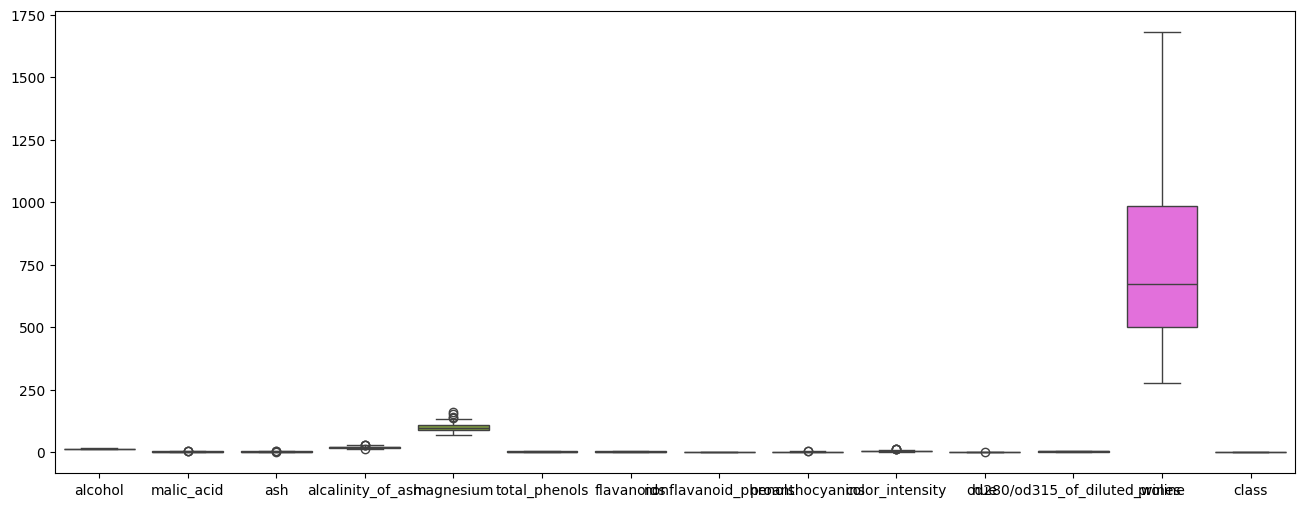

In [25]:
plt.figure(figsize=(16,6))

ax = sns.boxplot(df_wine)

### 4.9.2 - Check Normal Distribution

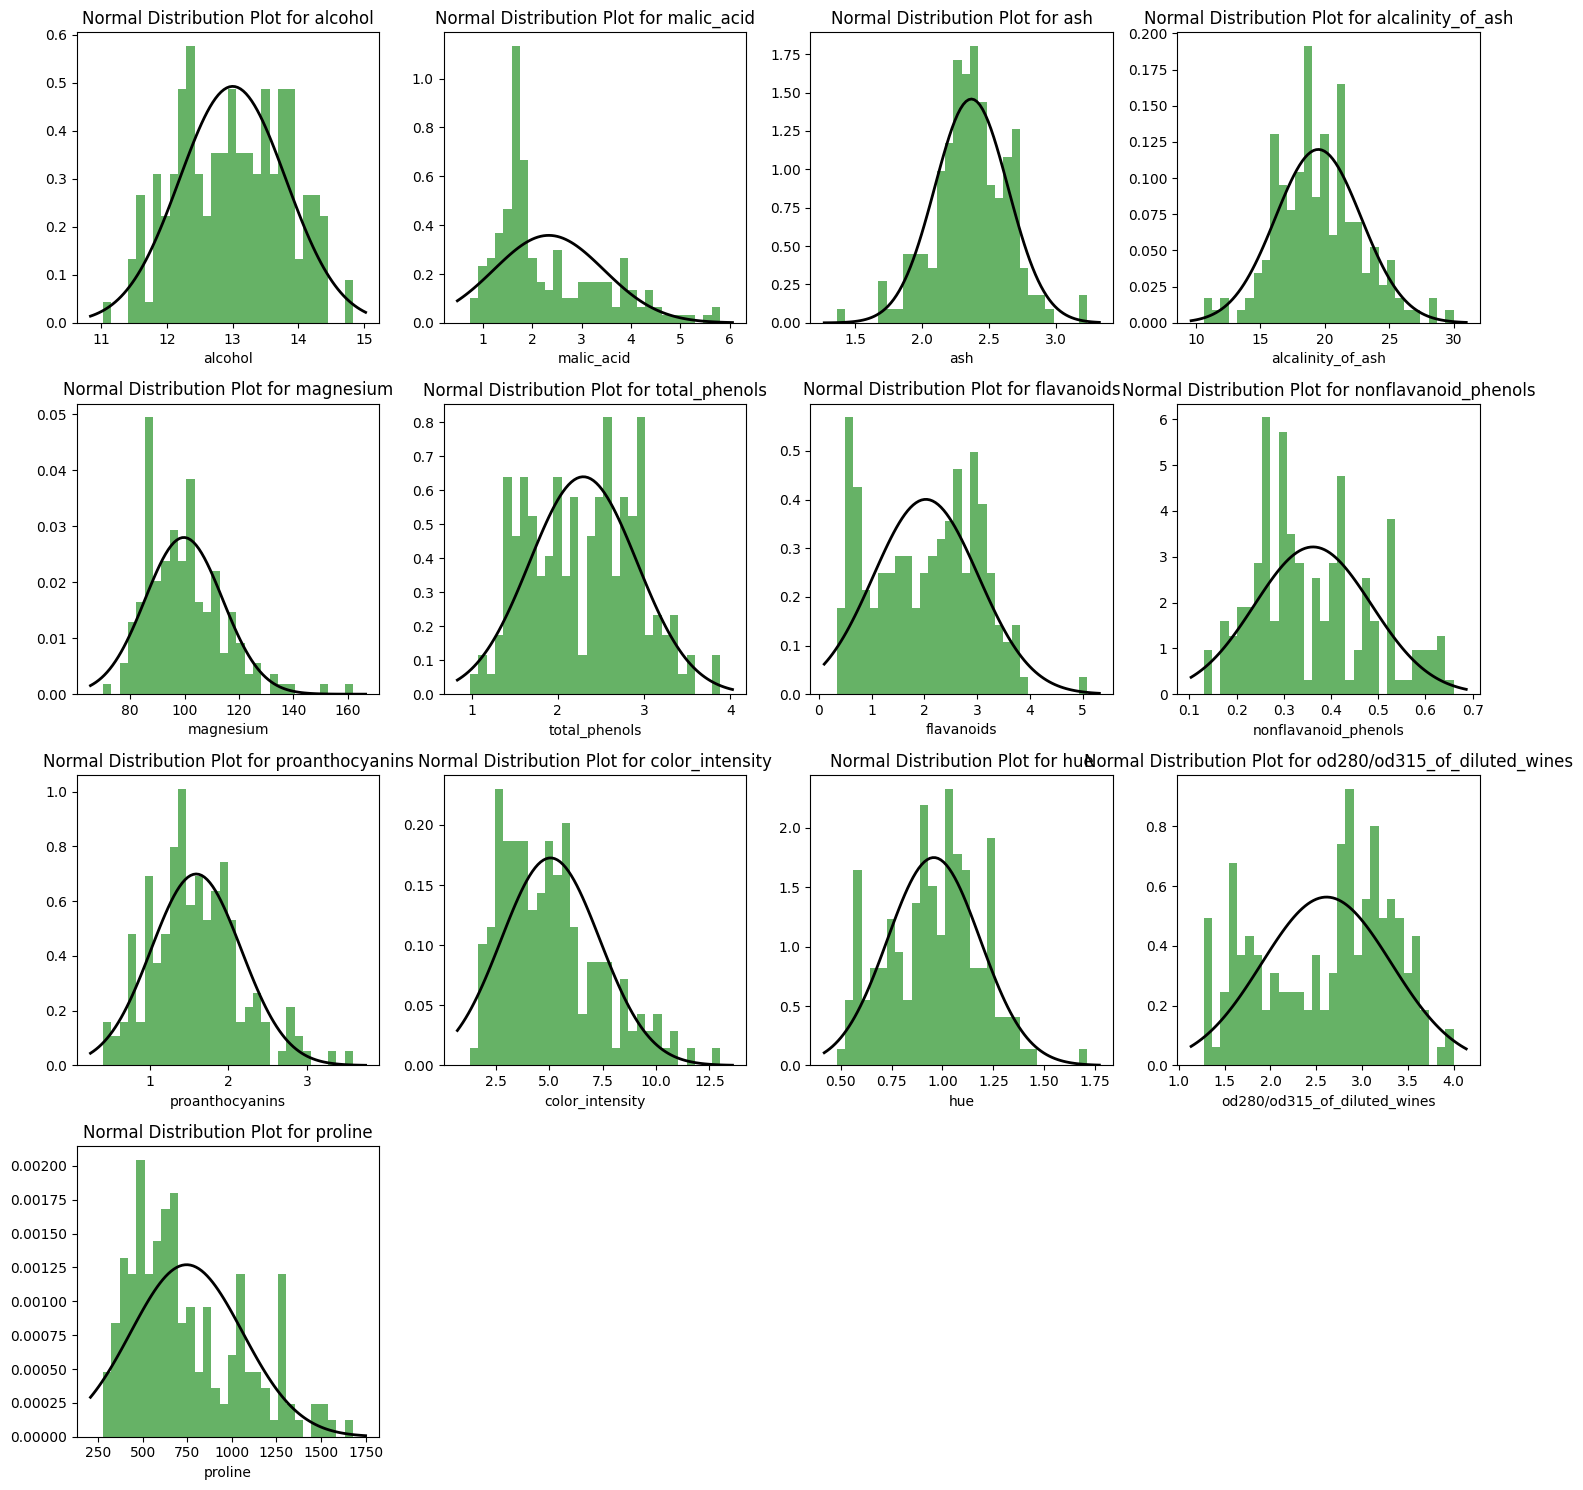

In [26]:
plot_normal_distribution_comparison(df_wine, 'class')

## 4.10 Check Correlation

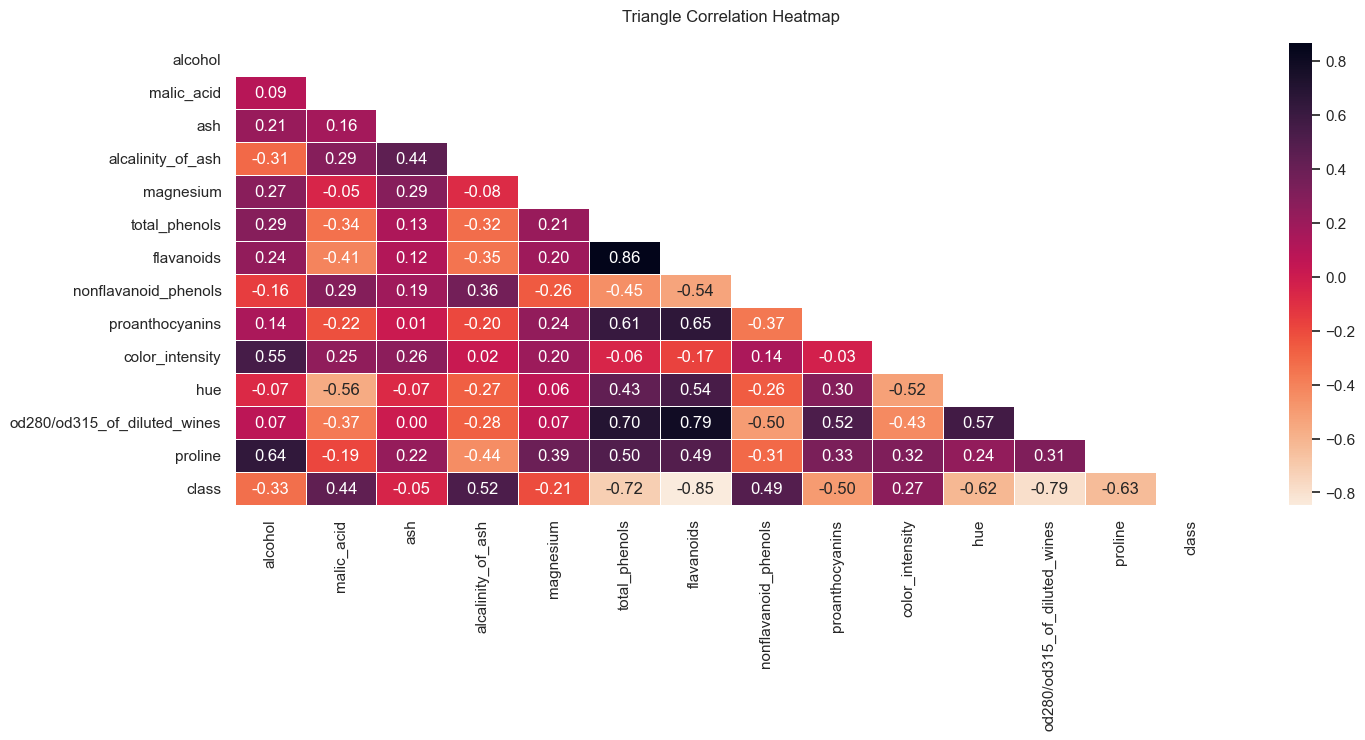

In [27]:
plot_triangle_correlation_heatmap(df_wine)

## 4.11 - Comparing the coefficients of magnitude of the highest correlations


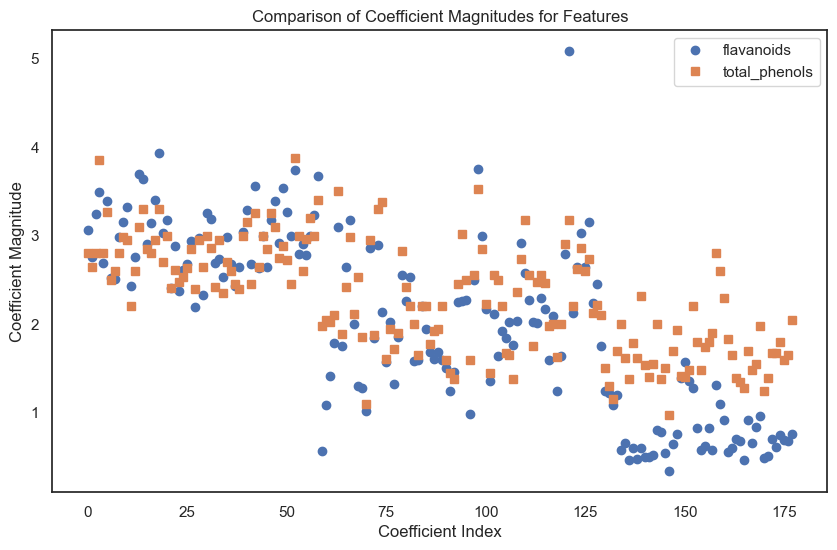

In [28]:
features_to_compare = ['flavanoids', 'total_phenols']

plot_coefficient_magnitude_comparison(features_to_compare, df_wine)

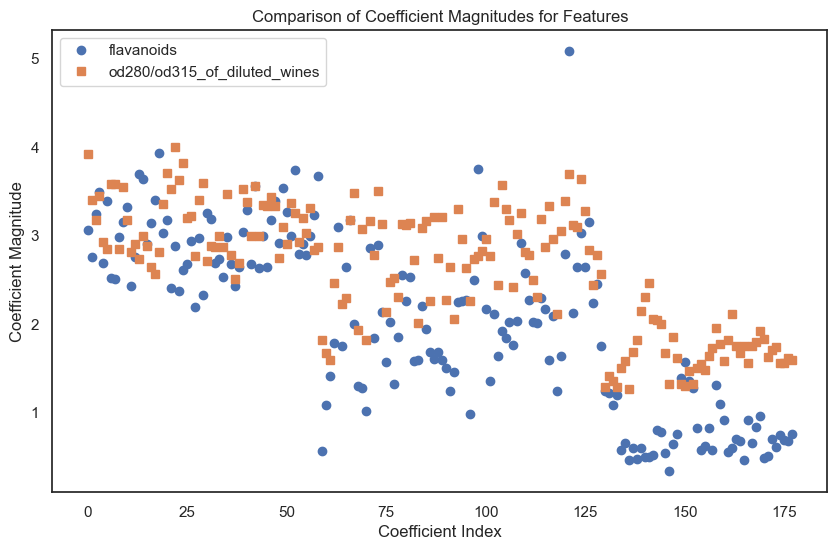

In [29]:
features_to_compare = ['flavanoids', 'od280/od315_of_diluted_wines']

plot_coefficient_magnitude_comparison(features_to_compare, df_wine)

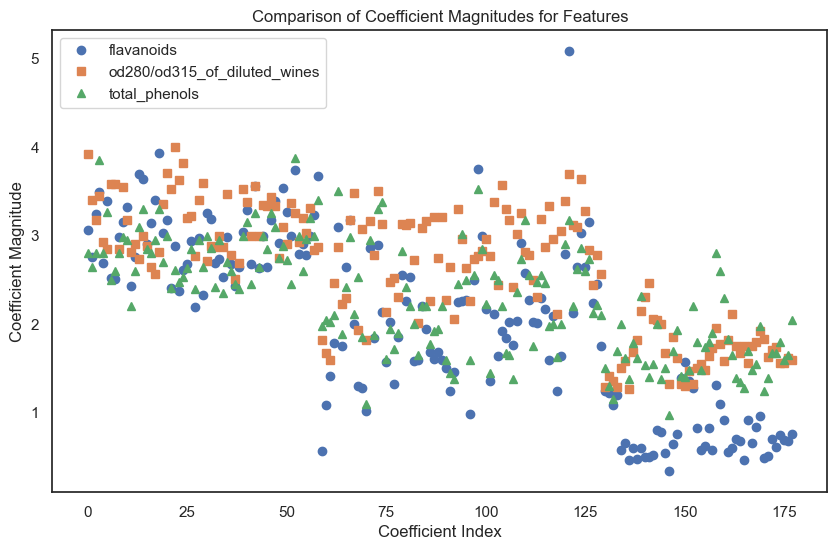

In [30]:
features_to_compare = ['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols']

plot_coefficient_magnitude_comparison(features_to_compare, df_wine)

## 4.12 - Check Pairplot

<Figure size 1600x600 with 0 Axes>

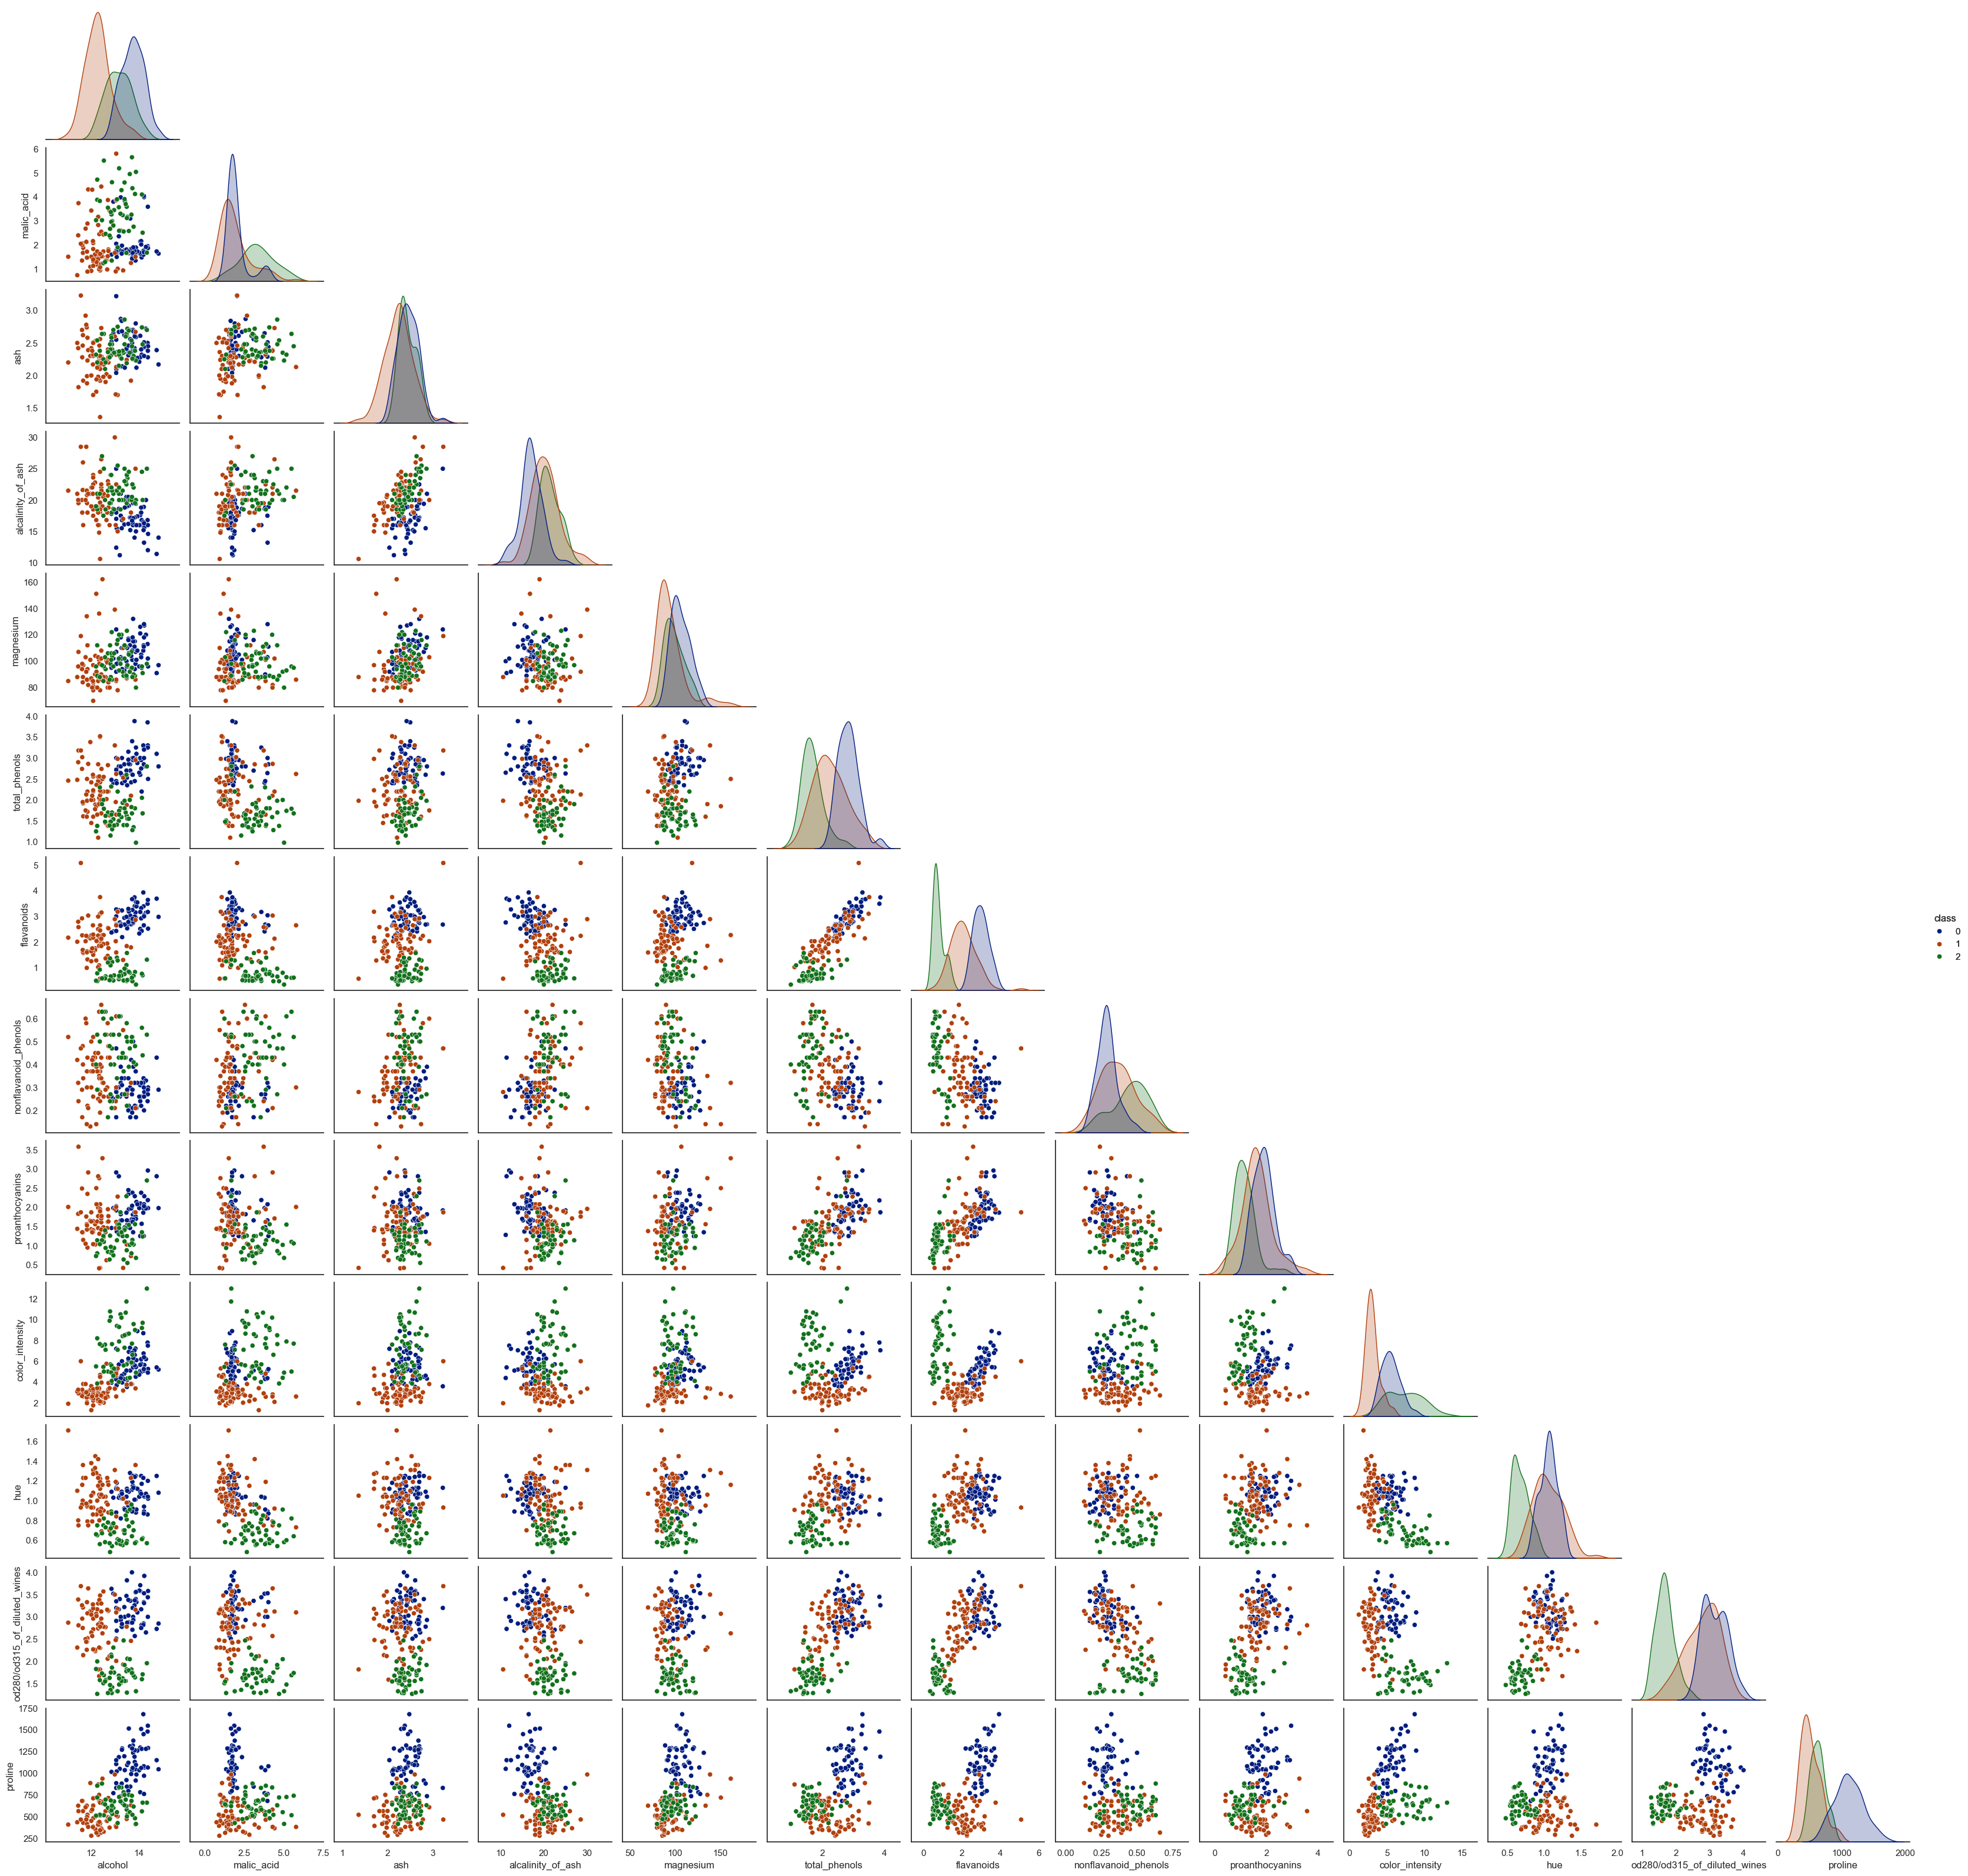

In [31]:
plt.figure(figsize=(16,6))

pairplot = sns.pairplot(df_wine,
                        hue='class',
                        palette="dark",
                        corner=True)

pairplot.add_legend()

plt.show()

## 4.13 - Check feature distribution by target

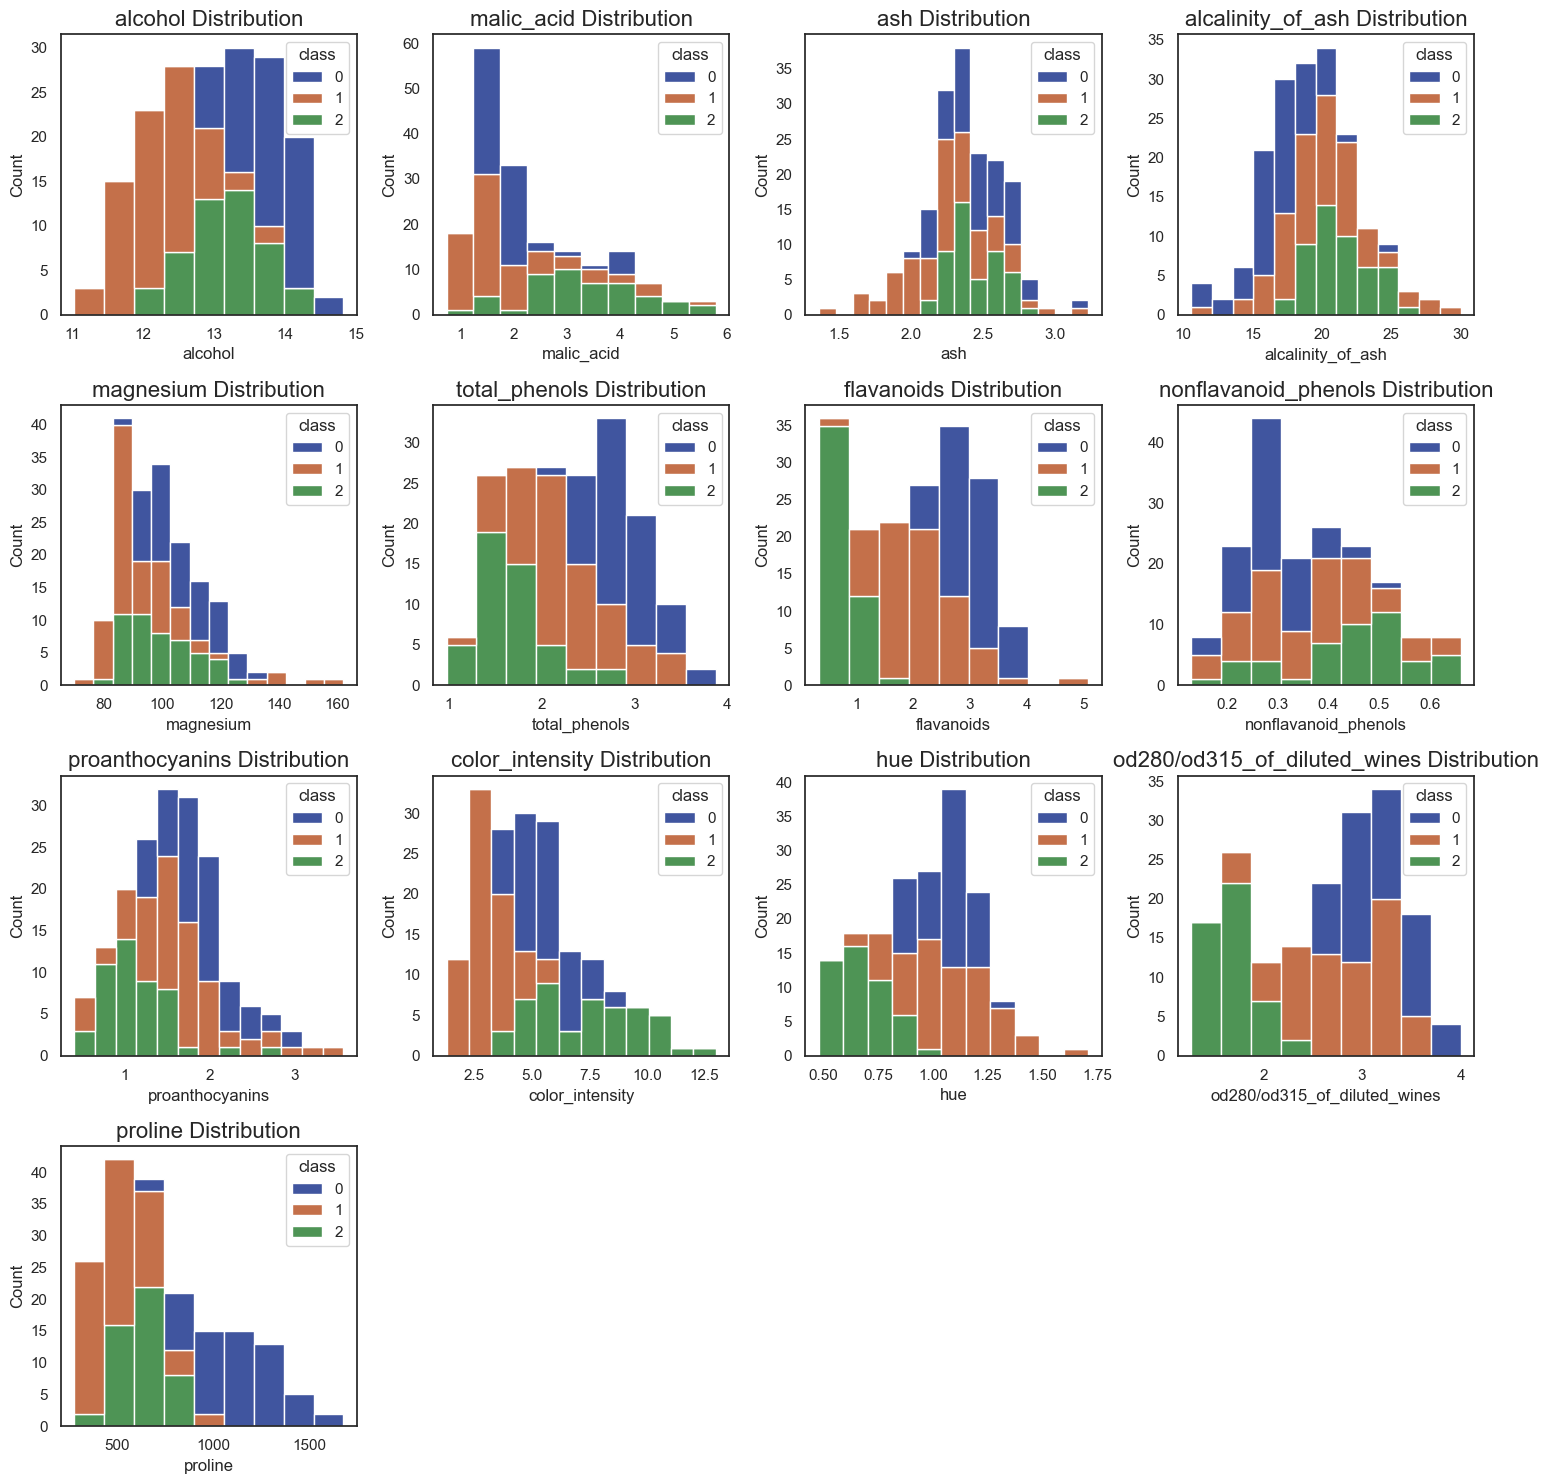

In [32]:
plot_feature_distributions_by_target(df_wine, 'class')

## 4.14 - Outliers 

### 4.14.1 - Find and Analyze

In [33]:
df_outliers, df_outliers_analyze = find_and_analyze_outliers(df_wine)

In [34]:
df_outliers_analyze

,Outliers Count,Outliers Percentage
alcalinity_of_ash,4,2.247191
magnesium,4,2.247191
color_intensity,4,2.247191
malic_acid,3,1.685393
ash,3,1.685393
proanthocyanins,2,1.123596
hue,1,0.561798


In [35]:
df_outliers

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1


### 4.14.2 - Visualization

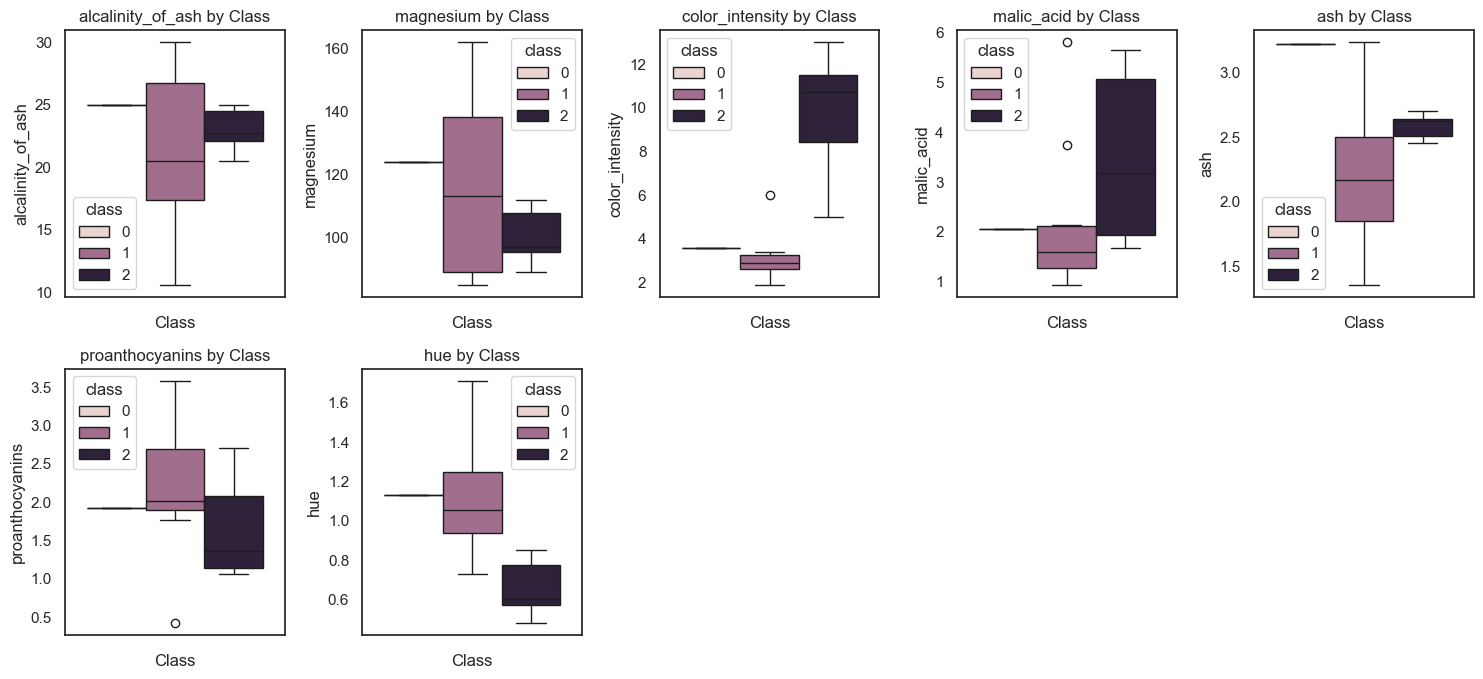

In [36]:
plot_boxplot(df_outliers, df_outliers_analyze.index.tolist())

## 4.15 - Insights

**General**
*   The information provided about the dataset is accurate
    *   Features: 14 (including the target)
    *   Labels: 178
    *   Numeric data types: float64, int32
    *   No categorical data
    *   No missing values
    *   No duplicate values
    *   Target contains 3 options: 0, 1, 2 (int32)


**Flavanoids**
*   Highest correlations between features
    *   Total Phenols: 0.86
    *   OD280/OD315 of diluted wines: 0.79
*   Lowest correlation with the target
    *   Class: -0.85


**Data Separation**
*   Proline, among all the features, exhibits the best separation, especially for class = 0.
*   Color_intensity also stands out, particularly in combination with Flavanoids and Total_phenols.

**Transformation**
*   The decision to transform them comes about because the KNN algorithm uses distance, in our case Euclidean, to classify the data. This makes it very sensitive to different scales and outliers.
*   The original data is on completely different scales.
    *   Lowest value is in Nonflavanoid Phenols: 0.13
    *   Highest value is in Proline: 1680.00
*   The original data has 7 features with outliers
    *  alcalinity_of_ash
    *  magnesium
    *  color_intensity
    *  malic_acid
    *  ash
    *  proanthocyanins
    *  hue
*  Why normalize instead of standardize?
    *  The original data has an approximate normal distribution.
    *  In addition, all data in a range from 0 to 1 will give equal importance to all Features for classification in KNN.

# 5 - TRANSFORMATION AND CLEANING

I mentioned earlier the reasons why I chose standardization. However, I will use standardization for comparative purposes.

## 5.1 - Backup Data

In [37]:
df_wine_without_outliers = df_wine.copy()

In [38]:
df_wine_without_outliers.drop(labels= df_outliers.index, inplace = True)

In [39]:
df_wine_without_outliers.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [40]:
df_wine_without_outliers.shape

(161, 14)

## 5.2 - Normalization

In [41]:
df_wine_without_outliers.drop(columns='class')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [42]:
normalized_obj = MinMaxScaler().fit(df_wine_without_outliers.drop(columns='class'))

In [43]:
normalized_obj = normalized_obj.transform(df_wine_without_outliers.drop(columns='class'))

In [44]:
normalized_obj

array([[0.8245614 , 0.21797753, 0.59836066, ..., 0.54945055, 0.97069597,
        0.56134094],
       [0.52339181, 0.23370787, 0.36065574, ..., 0.56043956, 0.78021978,
        0.55064194],
       [0.51169591, 0.36404494, 0.79508197, ..., 0.53846154, 0.6959707 ,
        0.64693295],
       ...,
       [0.54385965, 0.79550562, 0.45901639, ..., 0.05494505, 0.10622711,
        0.39728959],
       [0.51461988, 0.41573034, 0.54918033, ..., 0.06593407, 0.12820513,
        0.40085592],
       [0.79532164, 0.75505618, 0.85245902, ..., 0.07692308, 0.12087912,
        0.20114123]])

In [45]:
df_wine_normalized = pd.DataFrame(normalized_obj, columns=df_wine_without_outliers.drop(columns='class').columns)

In [46]:
df_wine_normalized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.824561,0.217978,0.598361,0.278481,0.890625,0.627586,0.757660,0.283019,0.737255,0.471861,0.549451,0.970696,0.561341
1,0.523392,0.233708,0.360656,0.000000,0.468750,0.575862,0.674095,0.245283,0.341176,0.335498,0.560440,0.780220,0.550642
2,0.511696,0.364045,0.795082,0.468354,0.484375,0.627586,0.807799,0.320755,0.941176,0.476190,0.538462,0.695971,0.646933
3,0.865497,0.271910,0.655738,0.354430,0.671875,0.989655,0.877437,0.207547,0.694118,0.705628,0.351648,0.798535,0.857347
4,0.535088,0.415730,0.959016,0.620253,0.750000,0.627586,0.654596,0.490566,0.552941,0.329004,0.549451,0.608059,0.325963


<Axes: >

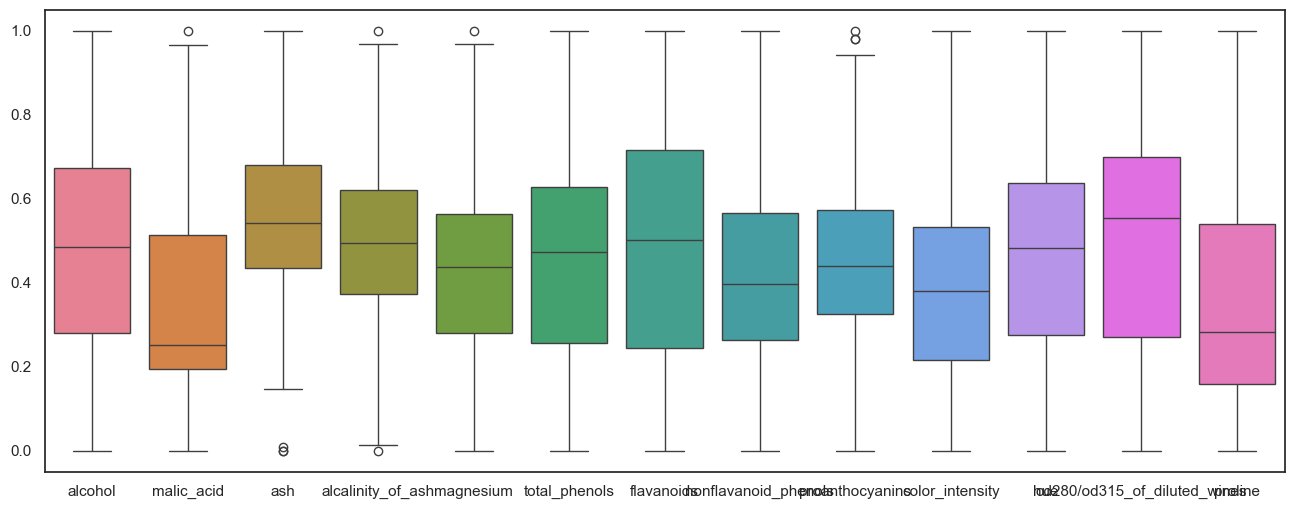

In [47]:
plt.figure(figsize=(16,6))

sns.boxplot(df_wine_normalized)

## 5.3 - Standardization

In [48]:
standardized_obj = StandardScaler().fit(df_wine_without_outliers.drop(columns='class'))

In [49]:
standardized_obj = standardized_obj.transform(df_wine_without_outliers.drop(columns='class'))

In [50]:
standardized_obj

array([[ 1.49571092, -0.57112999,  0.27742496, ...,  0.37214873,
         1.82667765,  0.94743557],
       [ 0.20069843, -0.50414451, -0.92862453, ...,  0.41815299,
         1.09101548,  0.90097568],
       [ 0.15040669,  0.05087806,  1.27553489, ...,  0.32614447,
         0.76562644,  1.31911473],
       ...,
       [ 0.28870899,  1.88819414, -0.42956957, ..., -1.69804288,
        -1.51209683,  0.23505052],
       [ 0.16297962,  0.27097322,  0.02789748, ..., -1.65203863,
        -1.42721274,  0.25053715],
       [ 1.36998156,  1.71594576,  1.56665028, ..., -1.60603437,
        -1.45550744, -0.61671423]])

In [51]:
df_wine_standardized = pd.DataFrame(standardized_obj, columns = df_wine_without_outliers.drop(columns='class').columns)

In [52]:
df_wine_standardized

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.495711,-0.571130,0.277425,-1.208619,2.309259,0.808420,1.034224,-0.643463,1.415284,0.296494,0.372149,1.826678,0.947436
1,0.200698,-0.504145,-0.928625,-2.672685,0.118914,0.570475,0.728906,-0.808165,-0.511374,-0.300438,0.418153,1.091015,0.900976
2,0.150407,0.050878,1.275535,-0.210392,0.200038,0.808420,1.217414,-0.478761,2.407227,0.315445,0.326144,0.765626,1.319115
3,1.671732,-0.341465,0.568540,-0.809329,1.173525,2.474030,1.471845,-0.972867,1.205450,1.319806,-0.455928,1.161752,2.232826
4,0.250990,0.270973,2.107293,0.588189,1.579144,0.808420,0.657665,0.262398,0.518720,-0.328863,0.372149,0.426090,-0.074682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.407700,0.194418,0.485365,0.255447,-0.611200,-0.968231,-1.367607,0.674153,-0.587678,2.219942,-1.560030,-1.299887,-0.306982
157,0.452157,1.534128,0.485365,1.253674,0.281162,-0.777876,-1.316721,0.591802,-0.263389,1.082929,-1.191996,-1.512097,-0.028222
158,0.288709,1.888194,-0.429570,0.255447,1.741392,-1.110998,-1.377785,0.591802,-0.377843,2.456820,-1.698043,-1.512097,0.235051
159,0.162980,0.270973,0.027897,0.255447,1.741392,-1.015820,-1.387962,1.415312,-0.168009,2.030440,-1.652039,-1.427213,0.250537


<Axes: >

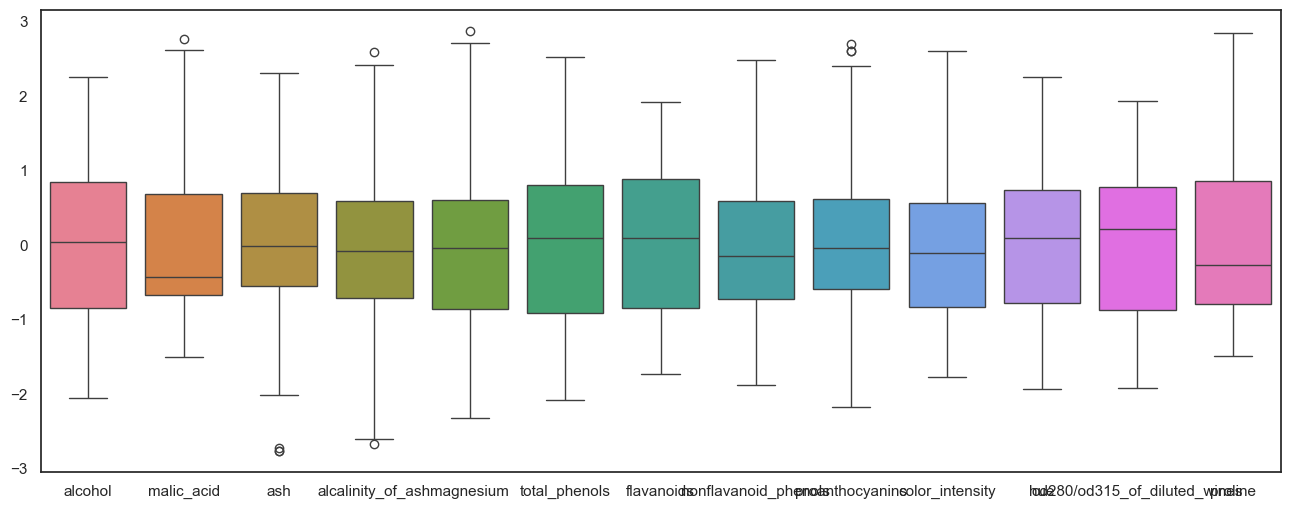

In [53]:
plt.figure(figsize=(16,6))

sns.boxplot(df_wine_standardized)

# 6 - DEFINING THE INPUT DATA

## 6.1 - Target

In [54]:
df_target = df_wine_without_outliers["class"]

## 6.2 - Normalized Data

In [55]:
df_normalized = df_wine_normalized

## 6.3 - Standardized Data

In [56]:
df_standardized = df_wine_standardized

# 7 - Exploring Model

## 7.1 - KNN

Some interesting parameters of the  **[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**
1. **n_neighbors**: Number of neighbors (Default = 5)..
2. **weights**: Weight of neighboring samples (Default = uniform).
3. **metric**: Metric used for distance calculation (Default = minkowski).
4. **p**: Power parameter for the metric (Default = 2, which is equivalent to Euclidean distance).
5. **n_jobs**: Number of parallel jobs to run during neighbor search (Default = 1).

## 7.2 - Accuracy List

In [57]:
model_scores = pd.DataFrame(columns=['Scale', 'Train Score', 'Test Score'])

## 7.3 - Normalized

In [58]:
train_and_evaluate_knn_model("Normalized", df_normalized, df_target)

----------------------------------
Train Confusion Matrix | Normalized
----------------------------------
Prediction   0   1   2  All
Real                       
0           44   0   0   44
1            2  42   2   46
2            0   0  30   30
All         46  42  32  120
----------------------------------
Train Score: 0.9666666666666667

----------------------------------
Test Confusion Matrix | Normalized
----------------------------------
Prediction   0   1   2  All
Real                       
0           14   0   0   14
1            0  15   0   15
2            0   0  12   12
All         14  15  12   41
Test Score: 1.0

--------------------------------------------------------------------
Test Classification Metrics | Normalized
--------------------------------------------------------------------
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        15
     class_2       1.00   

## 7.4 - Standardized

In [59]:
train_and_evaluate_knn_model('Standardized',df_standardized, df_target)

----------------------------------
Train Confusion Matrix | Standardized
----------------------------------
Prediction   0   1   2  All
Real                       
0           44   0   0   44
1            2  41   3   46
2            0   0  30   30
All         46  41  33  120
----------------------------------
Train Score: 0.9583333333333334

----------------------------------
Test Confusion Matrix | Standardized
----------------------------------
Prediction   0   1   2  All
Real                       
0           14   0   0   14
1            0  15   0   15
2            0   1  11   12
All         14  16  11   41
Test Score: 0.975609756097561

--------------------------------------------------------------------
Test Classification Metrics | Standardized
--------------------------------------------------------------------
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       0.94      1.00      0.97        15
     c

## 7.4 - Summary

In [60]:
model_scores

,Scale,Train Score,Test Score
0,Normalized,0.966667,1.00000
1,Standardized,0.958333,0.97561


## 7.5 - Insights

**General**
*   Both normalization and standardization had an accuracy above 95% in the test and training sets. This information could mean that:
    *   Overfitting
	*   Size of the test set
	*   Good separability
	*   Proper pre-processing
	*   Appropriate choice of hyperparaters
	
	
**Overfitting**
*   100% accuracy on the test set can be an indication of overfitting. Overfitting occurs when the model fits the training data so well that it does not generalize well to new data, i.e. the model "overlearns" the training data and is unable to generalize to previously unseen data. The fact that KNN has perfect accuracy on the test set suggests that it is memorizing the training data rather than finding general patterns.
	
**Size of the test set**
*   It may be that the test set is small, and, by coincidence, the examples in it are very well represented by the nearest neighbors in KNN. This can lead to 100% accuracy on the test set, but it doesn't necessarily mean that the model is optimal.
	
**Good separability**
*   If the data in the test set is easily separable, KNN can work very well, since it relies on the proximity of neighbors to make predictions. If the test examples are well spread out and the groups are clearly distinct, KNN is more likely to achieve high accuracy.

**Proper pre-processing**
*   Proper data pre-processing can lead to improved model performance. If the training and test data have been properly normalized, treated to eliminate outliers and prepared appropriately, this can contribute to improved performance.

**Appropriate choice of hyperparameters**
*   KNN's hyperparameters, such as the number of neighbors (k), can significantly affect the model's performance. The appropriate choice of hyperparameters is fundamental. It is important to check that the hyperparameters have been adjusted appropriately to avoid overfitting.id overfitting.

# 8 - Visualizing the boundaries of complexity

## 8.1 - Normalized

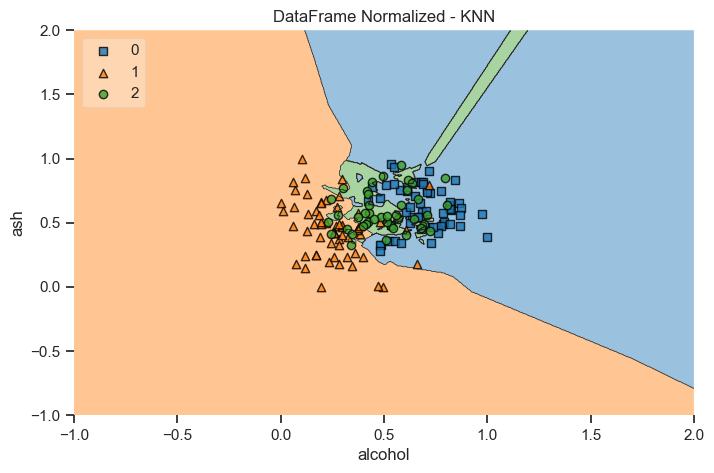

In [61]:
n_neighbors = 3
X = df_wine_normalized[["alcohol","ash"]].values
y = df_wine_without_outliers['class'].values

plot_knn_decision_regions(X, y, n_neighbors, "Normalized", ["alcohol","ash"])

## 8.2 - Standardized

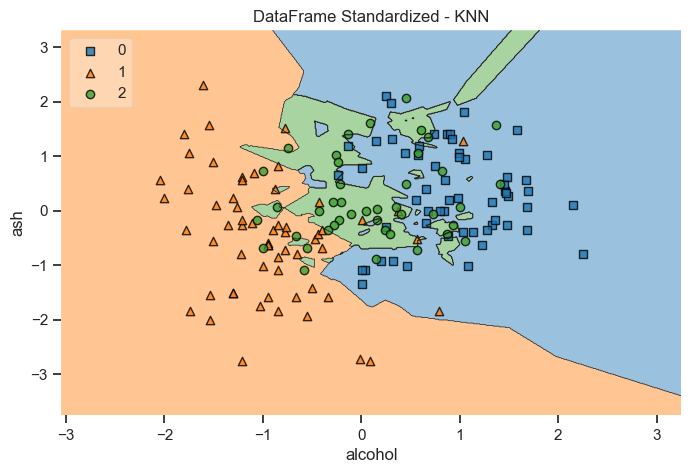

In [62]:
n_neighbors = 3
X = df_wine_standardized[["alcohol","ash"]].values
y = df_wine_without_outliers['class'].values

plot_knn_decision_regions(X, y, n_neighbors, "Standardized", ["alcohol","ash"])

# 9 - Conclusion

...